In [58]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", 10, "max_rows", 10, "max_colwidth", 12)

## Selecting Multiple DataFrame Columns

In [3]:
movies = pd.read_csv("data/movie.csv")
movie_actor_director = movies[["actor_1_name", "actor_2_name", "actor_3_name", "director_name"]]
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel Dav...,Wes Studi,James Ca...
1,Johnny Depp,Orlando ...,Jack Dav...,Gore Ver...
2,Christop...,Rory Kin...,Stephani...,Sam Mendes
3,Tom Hardy,Christia...,Joseph G...,Christop...
4,Doug Walker,Rob Walker,NaN,Doug Walker


In [5]:
movies[["director_name"]].head()

,director_name
0,James Ca...
1,Gore Ver...
2,Sam Mendes
3,Christop...
4,Doug Walker


In [6]:
movies["director_name"].head()

0    James Ca...
1    Gore Ver...
2     Sam Mendes
3    Christop...
4    Doug Walker
Name: director_name, dtype: object

In [7]:
cols = ["actor_1_name", "actor_2_name", "actor_3_name", "director_name"]
movie_actor_director = movies[cols]
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel Dav...,Wes Studi,James Ca...
1,Johnny Depp,Orlando ...,Jack Dav...,Gore Ver...
2,Christop...,Rory Kin...,Stephani...,Sam Mendes
3,Tom Hardy,Christia...,Joseph G...,Christop...
4,Doug Walker,Rob Walker,NaN,Doug Walker


In [12]:
type(movies.loc[ : , ["director_name"]])

pandas.core.frame.DataFrame

In [13]:
type(movies.loc[ :, "director_name"])

pandas.core.series.Series

## Selecting Columns with Methods

In [20]:
movies = pd.read_csv("data/movie.csv", index_col="movie_title")
movies.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Ca...,...,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Ver...,...,2.35,0
Spectre,Color,Sam Mendes,...,2.35,85000
The Dark Knight Rises,Color,Christop...,...,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,...,NaN,0


In [21]:
def shorten(col):
    return (col.replace("facebook_likes", "fb").replace("_for_reviews", ""))

In [22]:
movies = movies.rename(columns=shorten)
movies.dtypes.value_counts()

float64    13
object     11
int64       3
dtype: int64

In [23]:
movies.select_dtypes(include="int").head()

,num_voted_users,cast_total_fb,movie_fb
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [24]:
movies.select_dtypes(include="number").head()

,num_critic,duration,...,aspect_ratio,movie_fb
movie_title,,,,,
Avatar,723.0,178.0,...,1.78,33000
Pirates of the Caribbean: At World's End,302.0,169.0,...,2.35,0
Spectre,602.0,148.0,...,2.35,85000
The Dark Knight Rises,813.0,164.0,...,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,NaN,...,NaN,0


In [25]:
movies.select_dtypes(include=["int", "object"]).head()

,color,director_name,...,content_rating,movie_fb
movie_title,,,,,
Avatar,Color,James Ca...,...,PG-13,33000
Pirates of the Caribbean: At World's End,Color,Gore Ver...,...,PG-13,0
Spectre,Color,Sam Mendes,...,PG-13,85000
The Dark Knight Rises,Color,Christop...,...,PG-13,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,...,NaN,0


In [27]:
movies.select_dtypes(exclude="float").head()

,color,director_name,...,content_rating,movie_fb
movie_title,,,,,
Avatar,Color,James Ca...,...,PG-13,33000
Pirates of the Caribbean: At World's End,Color,Gore Ver...,...,PG-13,0
Spectre,Color,Sam Mendes,...,PG-13,85000
The Dark Knight Rises,Color,Christop...,...,PG-13,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,...,NaN,0


In [30]:
movies.filter(like="fb").head()

,director_fb,actor_3_fb,...,actor_2_fb,movie_fb
movie_title,,,,,
Avatar,0.0,855.0,...,936.0,33000
Pirates of the Caribbean: At World's End,563.0,1000.0,...,5000.0,0
Spectre,0.0,161.0,...,393.0,85000
The Dark Knight Rises,22000.0,23000.0,...,23000.0,164000
Star Wars: Episode VII - The Force Awakens,131.0,NaN,...,12.0,0


In [31]:
movies.filter(regex=r"\d").head()

,actor_3_fb,actor_2_name,...,actor_3_name,actor_2_fb
movie_title,,,,,
Avatar,855.0,Joel Dav...,...,Wes Studi,936.0
Pirates of the Caribbean: At World's End,1000.0,Orlando ...,...,Jack Dav...,5000.0
Spectre,161.0,Rory Kin...,...,Stephani...,393.0
The Dark Knight Rises,23000.0,Christia...,...,Joseph G...,23000.0
Star Wars: Episode VII - The Force Awakens,NaN,Rob Walker,...,NaN,12.0


In [32]:
cols = ["actor_1_name", "actor_2_name", "actor_3_name", "director_name"]
movies.filter(items=cols).head()

,actor_1_name,actor_2_name,actor_3_name,director_name
movie_title,,,,
Avatar,CCH Pounder,Joel Dav...,Wes Studi,James Ca...
Pirates of the Caribbean: At World's End,Johnny Depp,Orlando ...,Jack Dav...,Gore Ver...
Spectre,Christop...,Rory Kin...,Stephani...,Sam Mendes
The Dark Knight Rises,Tom Hardy,Christia...,Joseph G...,Christop...
Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,Doug Walker


## Ordering Column Names

In [33]:
movies = pd.read_csv("data/movie.csv")

def shorten(col):
    return (col.replace("facebook_likes", "fb").replace("_for_reviews", ""))

In [35]:
movies = movies.rename(columns=shorten)
movies.columns

Index(['color', 'director_name', 'num_critic', 'duration', 'director_fb',
       'actor_3_fb', 'actor_2_name', 'actor_1_fb', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_fb',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb', 'imdb_score', 'aspect_ratio',
       'movie_fb'],
      dtype='object')

In [36]:
movies.head()

,color,director_name,...,aspect_ratio,movie_fb
0,Color,James Ca...,...,1.78,33000
1,Color,Gore Ver...,...,2.35,0
2,Color,Sam Mendes,...,2.35,85000
3,Color,Christop...,...,2.35,164000
4,NaN,Doug Walker,...,NaN,0


In [37]:
cat_core = ['movie_title', 'title_year',
            'content_rating', 'genres']
cat_people = ['director_name', 'actor_1_name',
              'actor_2_name', 'actor_3_name']
cat_other = ['color', 'country', 'language',
             'plot_keywords', 'movie_imdb_link']
cont_fb = ['director_fb', 'actor_1_fb',
           'actor_2_fb', 'actor_3_fb',
           'cast_total_fb', 'movie_fb']
cont_finance = ['budget', 'gross']
cont_num_reviews = ['num_voted_users', 'num_user',
                    'num_critic']
cont_other = ['imdb_score', 'duration',
               'aspect_ratio', 'facenumber_in_poster']

In [38]:
new_col_order = cat_core + cat_people + cat_other + \
                cont_fb + cont_finance + cont_num_reviews + \
                cont_other

set(movies.columns) == set(new_col_order)

True

In [39]:
movies[new_col_order].head()

,movie_title,title_year,...,aspect_ratio,facenumber_in_poster
0,Avatar,2009.0,...,1.78,0.0
1,Pirates ...,2007.0,...,2.35,0.0
2,Spectre,2015.0,...,2.35,1.0
3,The Dark...,2012.0,...,2.35,0.0
4,Star War...,NaN,...,NaN,0.0


## Summarizing a DataFrame

In [40]:
movies = pd.read_csv("data/movie.csv")
movies.shape

(4916, 28)

In [41]:
movies.size

137648

In [43]:
movies.ndim

2

In [44]:
len(movies)

4916

In [48]:
# count 메서드를 활용하여 각 열에 누락값을 제외한 개수가 몇 개 인지 알아낼 수 있다
movies.count()

color                      4897
director_name              4814
num_critic_for_reviews     4867
duration                   4901
director_facebook_likes    4814
                           ... 
title_year                 4810
actor_2_facebook_likes     4903
imdb_score                 4916
aspect_ratio               4590
movie_facebook_likes       4916
Length: 28, dtype: int64

In [49]:
movies.min()

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


num_critic_for_reviews        1.0
duration                      7.0
director_facebook_likes       0.0
actor_3_facebook_likes        0.0
actor_1_facebook_likes        0.0
                            ...  
title_year                 1916.0
actor_2_facebook_likes        0.0
imdb_score                    1.6
aspect_ratio                 1.18
movie_facebook_likes            0
Length: 19, dtype: object

In [51]:
movies.describe().T

,count,mean,...,75%,max
num_critic_for_reviews,4867.0,137.988905,...,191.00,813.0
duration,4901.0,107.090798,...,118.00,511.0
director_facebook_likes,4814.0,691.014541,...,189.75,23000.0
actor_3_facebook_likes,4893.0,631.276313,...,633.00,23000.0
actor_1_facebook_likes,4909.0,6494.488491,...,11000.00,640000.0
...,...,...,...,...,...
title_year,4810.0,2002.447609,...,2011.00,2016.0
actor_2_facebook_likes,4903.0,1621.923516,...,912.00,137000.0
imdb_score,4916.0,6.437429,...,7.20,9.5
aspect_ratio,4590.0,2.222349,...,2.35,16.0


In [54]:
movies.describe(percentiles=[0.01, 0.3, 0.99])

,num_critic_for_reviews,duration,...,aspect_ratio,movie_facebook_likes
count,4867.000000,4901.000000,...,4590.000000,4916.000000
mean,137.988905,107.090798,...,2.222349,7348.294142
std,120.239379,25.286015,...,1.402940,19206.01...
min,1.000000,7.000000,...,1.180000,0.000000
1%,2.000000,43.000000,...,1.330000,0.000000
30%,60.000000,95.000000,...,1.850000,0.000000
50%,108.000000,103.000000,...,2.350000,159.000000
99%,546.680000,189.000000,...,4.000000,93850.00...
max,813.000000,511.000000,...,16.000000,349000.0...


In [59]:
movies.min(skipna=False)

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


num_critic_for_reviews     NaN
duration                   NaN
director_facebook_likes    NaN
actor_3_facebook_likes     NaN
actor_1_facebook_likes     NaN
                          ... 
title_year                 NaN
actor_2_facebook_likes     NaN
imdb_score                 1.6
aspect_ratio               NaN
movie_facebook_likes         0
Length: 19, dtype: object

## Chaining DataFrame Methods

In [60]:
movies = pd.read_csv('data/movie.csv')
def shorten(col):
    return (col.replace('facebook_likes', 'fb')
               .replace('_for_reviews', '')
    )
movies = movies.rename(columns=shorten)
movies.isnull().head()

,color,director_name,num_critic,duration,director_fb,...,title_year,actor_2_fb,imdb_score,aspect_ratio,movie_fb
0,False,False,False,False,False,...,False,False,False,False,False
1,False,False,False,False,False,...,False,False,False,False,False
2,False,False,False,False,False,...,False,False,False,False,False
3,False,False,False,False,False,...,False,False,False,False,False
4,True,False,True,True,False,...,True,False,False,True,False


In [62]:
movies.isnull().sum().head()

color             19
director_name    102
num_critic        49
duration          15
director_fb      102
dtype: int64

In [63]:
movies.isnull().sum().sum()

2654

In [65]:
movies.isnull().any().any()

True

In [66]:
movies.isnull().dtypes.value_counts()

bool    28
dtype: int64

In [69]:
movies[["color", "movie_title", "color"]].max()

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


movie_title    Æon Flux
dtype: object

In [70]:
with pd.option_context("max_colwidth", 20):
    movies.select_dtypes(include="object").fillna("").max()

In [72]:
movies.select_dtypes(["object"]).fillna("").max()

color                    Color
director_name      Étienne ...
actor_2_name       Zubaida ...
genres                 Western
actor_1_name       Óscar Ja...
                      ...     
plot_keywords      zombie|z...
movie_imdb_link    http://w...
language                  Zulu
country            West Ger...
content_rating               X
Length: 12, dtype: object

## DataFrame Operations

In [74]:
colleges = pd.read_csv("data/college.csv")
colleges.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,...,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama ...,Normal,AL,1.0,0.0,...,0.7356,0.8284,0.1049,30300,33888
1,Universi...,Birmingham,AL,0.0,0.0,...,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge ...,Montgomery,AL,0.0,0.0,...,0.6801,0.7795,0.8540,40100,23370
3,Universi...,Huntsville,AL,0.0,0.0,...,0.3072,0.4596,0.2640,45500,24097
4,Alabama ...,Montgomery,AL,1.0,0.0,...,0.7347,0.7554,0.1270,26600,33118.5


In [75]:
colleges + 5

TypeError: can only concatenate str (not "int") to str

In [84]:
colleges = pd.read_csv("data/college.csv", index_col="INSTNM")
college_udgs = colleges.filter(like="UGDS_")
college_udgs.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [85]:
name = 'Northwest-Shoals Community College'
college_udgs.loc[name]

UGDS_WHITE    0.7912
UGDS_BLACK    0.1250
UGDS_HISP     0.0339
UGDS_ASIAN    0.0036
UGDS_AIAN     0.0088
UGDS_NHPI     0.0006
UGDS_2MOR     0.0012
UGDS_NRA      0.0033
UGDS_UNKN     0.0324
Name: Northwest-Shoals Community College, dtype: float64

In [86]:
college_udgs.loc[name].round(2)

UGDS_WHITE    0.79
UGDS_BLACK    0.12
UGDS_HISP     0.03
UGDS_ASIAN    0.00
UGDS_AIAN     0.01
UGDS_NHPI     0.00
UGDS_2MOR     0.00
UGDS_NRA      0.00
UGDS_UNKN     0.03
Name: Northwest-Shoals Community College, dtype: float64

In [87]:
(college_udgs.loc[name] + 0.0001).round(2)

UGDS_WHITE    0.79
UGDS_BLACK    0.13
UGDS_HISP     0.03
UGDS_ASIAN    0.00
UGDS_AIAN     0.01
UGDS_NHPI     0.00
UGDS_2MOR     0.00
UGDS_NRA      0.00
UGDS_UNKN     0.03
Name: Northwest-Shoals Community College, dtype: float64

In [88]:
college_udgs + 0.00501

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03831,0.94031,0.01051,0.00691,0.00741,0.00691,0.00501,0.01091,0.01881
University of Alabama at Birmingham,0.59721,0.26501,0.03331,0.05681,0.00721,0.00571,0.04181,0.02291,0.01501
Amridge University,0.30401,0.42421,0.01191,0.00841,0.00501,0.00501,0.00501,0.00501,0.27651
University of Alabama in Huntsville,0.70381,0.13051,0.04321,0.04261,0.01931,0.00521,0.02221,0.03821,0.04001
Alabama State University,0.02081,0.92581,0.01711,0.00691,0.00601,0.00561,0.01481,0.02931,0.01871
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
(college_udgs + 0.00501) // .01

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,3.0,94.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
University of Alabama at Birmingham,59.0,26.0,3.0,5.0,0.0,0.0,4.0,2.0,1.0
Amridge University,30.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0
University of Alabama in Huntsville,70.0,13.0,4.0,4.0,1.0,0.0,2.0,3.0,4.0
Alabama State University,2.0,92.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
college_udgs_op_round = (college_udgs + .00501) // .01 / 100
college_udgs_op_round.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01


In [92]:
college_udgs_round = (college_udgs + .00001).round(2)
college_udgs_round

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
college_udgs_op_round.equals(college_udgs_round)

True

In [96]:
.045 + .005

0.049999999999999996

In [98]:
.045 + .005 + .00001

0.05001

In [105]:
college2 = college_udgs.add(.00501).floordiv(.01).div(100)
college2.equals(college_udgs_op_round)

True

## Comparing Missing Values

In [106]:
np.nan == np.nan

False

In [107]:
None == None

True

In [108]:
np.nan > 5

False

In [109]:
5 > np.nan

False

In [110]:
np.nan != 5

True

In [111]:
college = pd.read_csv("data/college.csv", index_col="INSTNM")
college_ugds = college.filter(like="UGDS_")

In [112]:
college_ugds == .0019

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,False,False,True,False,True,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,False,False,False,False,False,False,False,False,False
Rasmussen College - Overland Park,False,False,False,False,False,False,False,False,False
National Personal Training Institute of Cleveland,False,False,False,False,False,False,False,False,False


In [114]:
college_self_compare = college_ugds == college_ugds
college_self_compare.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,True,True,True,True,True,True,True,True,True
University of Alabama at Birmingham,True,True,True,True,True,True,True,True,True
Amridge University,True,True,True,True,True,True,True,True,True
University of Alabama in Huntsville,True,True,True,True,True,True,True,True,True
Alabama State University,True,True,True,True,True,True,True,True,True


In [116]:
# 모든 열에 False 값이 있음을 알 수 있다
college_self_compare.all()

UGDS_WHITE    False
UGDS_BLACK    False
UGDS_HISP     False
UGDS_ASIAN    False
UGDS_AIAN     False
UGDS_NHPI     False
UGDS_2MOR     False
UGDS_NRA      False
UGDS_UNKN     False
dtype: bool

In [118]:
(college_ugds == np.nan).sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [119]:
college_ugds.isnull().sum()

UGDS_WHITE    661
UGDS_BLACK    661
UGDS_HISP     661
UGDS_ASIAN    661
UGDS_AIAN     661
UGDS_NHPI     661
UGDS_2MOR     661
UGDS_NRA      661
UGDS_UNKN     661
dtype: int64

In [120]:
college_ugds.equals(college_ugds)

True

In [121]:
college_ugds.eq(.0019)

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,False,False,True,False,True,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,False,False,False,False,False,False,False,False,False
Rasmussen College - Overland Park,False,False,False,False,False,False,False,False,False
National Personal Training Institute of Cleveland,False,False,False,False,False,False,False,False,False


In [123]:
from pandas.testing import assert_frame_equal

assert_frame_equal(college_ugds, college_ugds) is None

True

## Transposing the direction of a DataFrame Operation

In [124]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds = college.filter(like='UGDS_')
college_ugds.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [125]:
college_ugds.count()

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [127]:
college_ugds.count(axis="columns")

INSTNM
Alabama A & M University                                  9
University of Alabama at Birmingham                       9
Amridge University                                        9
University of Alabama in Huntsville                       9
Alabama State University                                  9
                                                         ..
SAE Institute of Technology  San Francisco                0
Rasmussen College - Overland Park                         0
National Personal Training Institute of Cleveland         0
Bay Area Medical Academy - San Jose Satellite Location    0
Excel Learning Center-San Antonio South                   0
Length: 7535, dtype: int64

In [128]:
college_ugds.sum(axis="columns")

INSTNM
Alabama A & M University                                  1.0000
University of Alabama at Birmingham                       0.9999
Amridge University                                        1.0000
University of Alabama in Huntsville                       1.0000
Alabama State University                                  1.0000
                                                           ...  
SAE Institute of Technology  San Francisco                0.0000
Rasmussen College - Overland Park                         0.0000
National Personal Training Institute of Cleveland         0.0000
Bay Area Medical Academy - San Jose Satellite Location    0.0000
Excel Learning Center-San Antonio South                   0.0000
Length: 7535, dtype: float64

In [130]:
college_ugds.median(axis="index")

UGDS_WHITE    0.55570
UGDS_BLACK    0.10005
UGDS_HISP     0.07140
UGDS_ASIAN    0.01290
UGDS_AIAN     0.00260
UGDS_NHPI     0.00000
UGDS_2MOR     0.01750
UGDS_NRA      0.00000
UGDS_UNKN     0.01430
dtype: float64

In [132]:
college_ugds.median(axis="columns")

INSTNM
Alabama A & M University                                  0.0055
University of Alabama at Birmingham                       0.0283
Amridge University                                        0.0034
University of Alabama in Huntsville                       0.0350
Alabama State University                                  0.0121
                                                           ...  
SAE Institute of Technology  San Francisco                   NaN
Rasmussen College - Overland Park                            NaN
National Personal Training Institute of Cleveland            NaN
Bay Area Medical Academy - San Jose Satellite Location       NaN
Excel Learning Center-San Antonio South                      NaN
Length: 7535, dtype: float64

In [134]:
college_ugds.cumsum(axis=1).head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9686,0.9741,0.9760,0.9784,0.9803,0.9803,0.9862,1.0000
University of Alabama at Birmingham,0.5922,0.8522,0.8805,0.9323,0.9345,0.9352,0.9720,0.9899,0.9999
Amridge University,0.2990,0.7182,0.7251,0.7285,0.7285,0.7285,0.7285,0.7285,1.0000
University of Alabama in Huntsville,0.6988,0.8243,0.8625,0.9001,0.9144,0.9146,0.9318,0.9650,1.0000
Alabama State University,0.0158,0.9366,0.9487,0.9506,0.9516,0.9522,0.9620,0.9863,1.0000


## Determining college campus diversity

In [135]:
pd.read_csv("data/college_diversity.csv", index_col="School")

,Diversity Index
School,
"Rutgers University--Newark Newark, NJ",0.76
"Andrews University Berrien Springs, MI",0.74
"Stanford University Stanford, CA",0.74
"University of Houston Houston, TX",0.74
"University of Nevada--Las Vegas Las Vegas, NV",0.74
"University of San Francisco San Francisco, CA",0.74
"San Francisco State University San Francisco, CA",0.73
"University of Illinois--Chicago Chicago, IL",0.73
"New Jersey Institute of Technology Newark, NJ",0.72


In [136]:
college = pd.read_csv("data/college.csv", index_col="INSTNM")
college_ugds = college.filter(like="UGDS_")

In [139]:
college_ugds.isnull().sum(axis=1).sort_values(ascending=False)

INSTNM
Excel Learning Center-San Antonio South              9
Western State College of Law at Argosy University    9
Albany Law School                                    9
Albany Medical College                               9
A T Still University of Health Sciences              9
                                                    ..
SUNY at Binghamton                                   0
SUNY at Albany                                       0
Morrisville State College                            0
Farmingdale State College                            0
The University of Texas at Austin                    0
Length: 7535, dtype: int64

In [140]:
college_ugds = college_ugds.dropna(axis=0, how="all")
college_ugds.isnull().sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [141]:
college_ugds.ge(.15)

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,True,False,False,False,False,False,False,False
University of Alabama at Birmingham,True,True,False,False,False,False,False,False,False
Amridge University,True,True,False,False,False,False,False,False,True
University of Alabama in Huntsville,True,False,False,False,False,False,False,False,False
Alabama State University,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
Hollywood Institute of Beauty Careers-West Palm Beach,True,True,True,False,False,False,False,False,False
Hollywood Institute of Beauty Careers-Casselberry,False,True,True,False,False,False,False,False,False
Coachella Valley Beauty College-Beaumont,True,False,True,False,False,False,False,False,False


In [143]:
diversity_metric = college_ugds.ge(.15).sum(axis=1)
diversity_metric.head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

<AxesSubplot:>

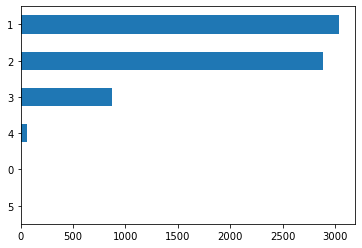

In [155]:
diversity_metric.value_counts().sort_values().plot.barh()

In [156]:
diversity_metric.sort_values(ascending=False).head()

INSTNM
Central Texas Beauty College-Temple                               5
Regency Beauty Institute-Austin                                   5
Westwood College-O'Hare Airport                                   4
Regency Beauty Institute-Pasadena                                 4
Soma Institute-The National School of Clinical Massage Therapy    4
dtype: int64

In [157]:
college_ugds.loc[["Regency Beauty Institute-Austin",
                  "Central Texas Beauty College-Temple"]]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Regency Beauty Institute-Austin,0.1867,0.2133,0.1600,0.0000,0.0,0.0,0.1733,0.0,0.2667
Central Texas Beauty College-Temple,0.1616,0.2323,0.2626,0.0202,0.0,0.0,0.1717,0.0,0.1515


In [158]:
us_news_top = ['Rutgers University-Newark',
                  'Andrews University',
                  'Stanford University',
                  'University of Houston',
                  'University of Nevada-Las Vegas']

diversity_metric.loc[us_news_top]

INSTNM
Rutgers University-Newark         4
Andrews University                3
Stanford University               3
University of Houston             3
University of Nevada-Las Vegas    3
dtype: int64

In [160]:
college_ugds.max(axis=1).sort_values(ascending=False).head(10)

INSTNM
Caribbean University-Ponce                                        1.0
Brighton Institute of Cosmetology                                 1.0
Mesivta Torah Vodaath Rabbinical Seminary                         1.0
Rabbinical College Telshe                                         1.0
University of Puerto Rico-Mayaguez                                1.0
Haskell Indian Nations University                                 1.0
Lake Career and Technical Center                                  1.0
Leon Studio One School of Hair Design & Career Training Center    1.0
Dewey University-Hato Rey                                         1.0
Columbia Central University-Caguas                                1.0
dtype: float64

In [171]:
(college_ugds > .01).all(axis=1)

INSTNM
Alabama A & M University                                 False
University of Alabama at Birmingham                      False
Amridge University                                       False
University of Alabama in Huntsville                      False
Alabama State University                                 False
                                                         ...  
Hollywood Institute of Beauty Careers-West Palm Beach    False
Hollywood Institute of Beauty Careers-Casselberry        False
Coachella Valley Beauty College-Beaumont                 False
Dewey University-Mayaguez                                False
Coastal Pines Technical College                          False
Length: 6874, dtype: bool

In [177]:
college_ugds[(college_ugds > .01).all(axis=1)]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
John F. Kennedy University,0.3665,0.1554,0.2590,0.0837,0.0159,0.0120,0.0359,0.0319,0.0398
National Holistic Institute,0.4122,0.0933,0.1889,0.0689,0.0111,0.0278,0.1522,0.0267,0.0189
Santa Fe University of Art and Design,0.4529,0.0703,0.2765,0.0191,0.0250,0.0179,0.0751,0.0501,0.0131
Eastern Oregon University,0.7611,0.0294,0.0624,0.0207,0.0254,0.0113,0.0133,0.0150,0.0614
New Hope Christian College-Eugene,0.6111,0.0370,0.0864,0.0370,0.0123,0.0432,0.0926,0.0247,0.0556
...,...,...,...,...,...,...,...,...,...
Northwest College of Art & Design,0.5851,0.0213,0.0957,0.0213,0.0426,0.0213,0.0851,0.0106,0.1170
University of Washington-Tacoma Campus,0.4488,0.0768,0.1032,0.1703,0.0111,0.0169,0.0755,0.0444,0.0531
United States University,0.1168,0.2482,0.2372,0.0839,0.0109,0.0401,0.0657,0.0219,0.1752
